<a href="https://colab.research.google.com/github/Nikita-liubietskii/ABD-PRJ-25-22-/blob/main/%D0%9A%D0%BE%D0%BC%D0%B0%D0%BD%D0%B4%D0%B0_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Команда 22. Анализ популярности статей**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

1. **Описать признаки** и **определить их тип**

2. Изучить и видоизменить признак shares + удалить выбросы по нему (Максим)

3. Определить какие признаки мы будем использовать (Никита)

Убрать пробелы в начале названия признаков (Максим)

4. Подготовка данных:
  - Работа с количественными признаками
    + Гистограммы/ящики с усами
    + Замена пропусков/удаление выбросов
  - Работа с категориальными данными
    + Замена пропусков
    + Перекодиование
  - Описательные статистики по всем признакам .describe()

5. EDA. Как предикторы влияют на целевую переменную (ЗП)?
  - Для количественных: диаграмма рассеяния
  - Для категориальных: столбчатые диаграммы
6. Формирование гипотез на основе EDA


## Данные

https://www.kaggle.com/datasets/deepakshende/onlinenewspopularity

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ПРОЕКТЫ_ABD/Команда_22/OnlineNewsPopularity.csv')
pd.set_option('display.max_columns', None)
df.columns = df.columns.str.strip()
df.sample(5)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
17336,http://mashable.com/2013/12/10/unofficial-chri...,394.0,13.0,251.0,0.663793,1.0,0.767857,17.0,1.0,17.0,0.0,5.063745,8.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,751.0,217.875000,10300.0,843300.0,285800.000000,2655.307692,5719.208036,4014.073353,3000.0,3000.0,3000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.168071,0.025024,0.157374,0.323430,0.326101,0.440976,0.239293,0.035857,0.003984,0.900000,0.100000,0.426599,0.136364,0.85,-0.250000,-0.25,-0.250000,0.525000,-0.300000,0.025000,0.300000,983
28212,http://mashable.com/2014/07/02/usa-soccer-worl...,189.0,13.0,456.0,0.573951,1.0,0.778986,0.0,0.0,2.0,6.0,4.923246,8.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,1600.0,375.666667,0.0,843300.0,137475.000000,0.000000,3815.088889,2088.820837,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.025009,0.025010,0.789105,0.025043,0.135834,0.371298,-0.066615,0.017544,0.041667,0.296296,0.703704,0.301326,0.100000,0.50,-0.265351,-0.70,-0.166667,0.416667,-0.233333,0.083333,0.233333,1500
13509,http://mashable.com/2013/09/24/hp-pavilion-tou...,471.0,10.0,715.0,0.499281,1.0,0.659624,11.0,8.0,11.0,0.0,4.450350,9.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,872.0,317.375000,0.0,843300.0,198622.222222,0.000000,3692.160494,2339.768066,2200.0,49000.0,20850.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023465,0.022231,0.909784,0.022267,0.022253,0.435588,0.243057,0.054545,0.004196,0.928571,0.071429,0.391242,0.033333,1.00,-0.225000,-0.40,-0.100000,0.333333,0.250000,0.166667,0.250000,1300
34001,http://mashable.com/2014/10/03/most-talked-abo...,95.0,11.0,722.0,0.479167,1.0,0.638826,12.0,0.0,1.0,0.0,4.927978,6.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,696.0,191.166667,33000.0,843300.0,199650.000000,2180.753352,3924.814815,2988.812105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.033334,0.033334,0.678577,0.033333,0.221422,0.551900,0.200132,0.076177,0.013850,0.846154,0.153846,0.359712,0.100000,0.90,-0.187500,-0.50,-0.050000,0.454545,0.136364,0.045455,0.136364,1300
16722,http://mashable.com/2013/11/27/kids-thanksgiving/,407.0,8.0,854.0,0.489747,1.0,0.681818,21.0,3.0,1.0,0.0,4.500000,10.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,1600.0,477.111111,0.0,843300.0,135900.000000,0.000000,7593.125000,3776.429950,3100.0,3100.0,3100.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.218878,0.123288,0.020006,0.187398,0.450430,0.538166,0.188682,0.049180,0.025761,0.656250,0.343750,0.501050,0.062500,1.00,-0.272815,-0.60,-0.076923,0.000000,0.000000,0.500000,0.000000,1200


In [ ]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,7.223767,0.052946,0.178009,0.157855,0.058597,0.185299,0.212567,26.106801,1153.951682,312.366967,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639,3998.755396,10329.212662,6401.697580,0.168020,0.186409,0.187544,0.183306,0.143805,0.061876,0.069039,0.130915,0.184599,0.141256,0.216321,0.223770,0.234029,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,1.909130,0.223929,0.382525,0.364610,0.234871,0.388545,0.409129,69.633215,3857.990877,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,19738.670516,41027.576613,24211.332231,0.373889,0.389441,0.390353,0.386922,0.350896,0.240933,0.253524,0.337312,0.262975,0.219707,0.282145,0.295191,0.289183,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,445.000000,141.750000,0.000000,843300.000000,172846.875000,0.000000,3562.101631,2382.448566,639.000000,1100.000000,981.187500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025051,0.025012,0.028571,0.028571,0.0

|№|Столбец|Eng|Рус|тип данных|
|--|-----|---|-- |---|
|1.|  url |URL of the article| URL адрес источника|
|2.|  timedelta|Days between the article publication and the dataset acquisition|кол-во дней между публикацией до получения данных|КН|
|3.|  n_tokens_title|Number of words in the title|кол-во слов в заголовке|ЧД|
|4.|  n_tokens_content|Number of words in the content|кол-во слов в статье|ЧД|
|5.|  n_unique_tokens|Rate of unique words in the content|доля уникальных слов в статье|ЧН|
|6.|  n_non_stop_words|Rate of non-stop words in the content|доля нонстоп-слов в статье|ЧН|
|7.|  n_non_stop_unique_tokens|Rate of unique non-stop words in the content|доля уникальных нонстоп-слов в статье|ЧН|
|8.|  num_hrefs|Number of links|кол-во ссылок в статье|ЧД|
|9.|  num_self_hrefs|Number of links to other articles published by Mashable|кол-во ссылок на другие статьи, опубликованные в Mashable|ЧД|
|10.| num_imgs|Number of images|кол-во изображений в статье|ЧД|
|11.| num_videos|Number of videos|кол-во видео в статье|ЧД|
|12.| average_token_length|Average length of the words in the content|средняя длина слов в статье|ЧН|
|13.| num_keywords|Number of keywords in the metadata|кол-во ключевых слов в метаданных|ЧД|
|14.| data_channel_is_lifestyle|Is data channel 'Lifestyle'?|из рубрики 'Lifestyle'?|КНБ|
|15.| data_channel_is_entertainment|Is data channel 'Entertainment'?|из рубрики 'Entertainment'?|КНБ|
|16.| data_channel_is_bus|Is data channel 'Business'?|из рубрики 'Business'?|КНБ|
|17.| data_channel_is_socmed|Is data channel 'Social Media'?|из рубрики 'Social Media'?|КНБ|
|18.| data_channel_is_tech|Is data channel 'Tech'?|из рубрики 'Tech'?|КНБ|
|19.| data_channel_is_world|Is data channel 'World'?|из рубрики 'World'?|КНБ|
|20.| kw_min_min|Worst keyword (min. shares)|худшее ключевое слово (мин кол-во cсылок)|ЧД|
|21.| kw_max_min|Worst keyword (max. shares)|худшее ключевое слово (макс. кол-во cсылок)|ЧД? (что с 1.59)|
|22.| kw_avg_min|Worst keyword (avg. shares)|худшее ключевое слово (средн. кол-во cсылок)|ЧН|
|23.| kw_min_max|Best keyword (min. shares)|лучшее ключевое слово (мин. кол-во cсылок)|ЧД|
|24.| kw_max_max|Best keyword (max. shares)|лучшее ключевое слово (макс. кол-во cсылок)|ЧД|
|25.| kw_min_avg|Best keyword (avg. shares)|лучшее ключевое слово (средн. кол-во cсылок)|ЧН|
|26.| kw_min_avg|Avg. keyword (min. shares)|среднее ключевое слово (средн. кол-во cсылок)|ЧН|
|27.| kw_max_avg|Avg. keyword (max. shares)|среднее ключевое слово (макс.  кол-во cсылок)|ЧН|
|28.| kw_avg_avg|Avg. keyword (avg. shares)|среднее ключевое слово (средн.  кол-во cсылок)|ЧН|
|29.| self_reference_min_shares|Min. shares of referenced articles in Mashable|мин. кол-во упоминаемых статей в Mashable|ЧД (но 1.59)|
|30.| self_reference_max_shares|Max. shares of referenced articles in Mashable|макс. кол-во упоминаемых статей в Mashable|ЧД (но 1.59)|
|31.| self_reference_avg_sharess|Avg. shares of referenced articles in Mashable|средн. кол-во упоминаемых статей в Mashable|ЧН|
|32.| weekday_is_monday|Was the article published on a Monday?|день публикации 'Понедельник'?|КНБ|
|33.| weekday_is_tuesday|Was the article published on a Tuesday?|день публикации 'Вторник'?|КНБ|
|34.| weekday_is_wednesday|Was the article published on a Wednesday?|день публикации 'Среда'?|КНБ|
|35.| weekday_is_thursday|Was the article published on a Thursday?|день публикации 'Четверг'?|КНБ|
|36.| weekday_is_friday|Was the article published on a Friday?|день публикации 'Пятница'?|КНБ|
|37.| weekday_is_saturda|Was the article published on a Saturday?|день публикации 'Суббота'?|КНБ|
|38.| weekday_is_sunday|Was the article published on a Sunday?|день публикации 'Воскресенье'?|КНБ|
|39.| is_weekend|Was the article published on the weekend?|день публикации 'Выходные'|КНБ|
|40.| LDA_00|Closeness to LDA topic 0|близость LDA (Latent Dirichlet Allocation):  0|ЧН|
|41.| LDA_01|Closeness to LDA topic 1|близость LDA (Latent Dirichlet Allocation):  1|ЧН|
|42.| LDA_02|Closeness to LDA topic 2|близость LDA (Latent Dirichlet Allocation): 2|ЧН|
|43.| LDA_03|Closeness to LDA topic 3|близость LDA (Latent Dirichlet Allocation):  3|ЧН|
|44.| LDA_04|Closeness to LDA topic 4|близость LDA (Latent Dirichlet Allocation):  4|ЧН|
|45.| global_subjectivity|Text subjectivity|субъективность текста|ЧН|
|46.| global_sentiment_polarity|Text sentiment polarity|общая полярность настроения текста|ЧН|
|47.| global_rate_positive_words|Rate of positive words in the content|доля позитивных слов в статье|ЧН|
|48.| global_rate_negative_words|Rate of negative words in the content|доля негативных слов в статье|ЧН|
|49.| rate_positive_words|Rate of positive words among non-neutral tokens|доля позитивных слов среди не нейтральных слов|ЧН|
|50.| rate_negative_words|Rate of negative words among non-neutral tokens|доля негативных слов среди не нейтральных слов|ЧН|
|51.| avg_positive_polarity|Avg. polarity of positive words|средн. полярность положительных слов|ЧН|
|52.| min_positive_polarity|Min. polarity of positive words|мин. полярность положительных слов|ЧН|
|53.| max_positive_polarity|Max. polarity of positive words|макс. полярность положительных слов|ЧН|
|54.| avg_negative_polarity|Avg. polarity of negative words|средн. полярность отрицательных слов|ЧН|
|55.| min_negative_polarity|Min. polarity of negative words|мин. полярность отрицательных слов|ЧН|
|56.| max_negative_polarity|Max. polarity of negative words|макс. полярность отрицательных слов|ЧН|
|57.| title_subjectivity|Title subjectivity|субъективность заголовка|ЧН|
|58.| title_sentiment_polarity|Title polarity|полярность настроения заголовка|ЧН|
|59.| abs_title_subjectivity|Absolute subjectivity level|уровень абсолютной субъективности заголовка|ЧН|
|60.| abs_title_sentiment_polarity|Absolute polarity level|уровень абсолютой полярности заголовка|ЧН|
|61.| shares|Number of shares|кол-во ссылок|ЧД|

## Подготовка признаков

### Количественные признаки

#### Популярность (`shares`)

##### Нормализация

In [ ]:
# логорифмирование переменной 'shares' и добавление нового признака в df.
df['ln_shares'] = np.log(df['shares'])

Text(0.5, 1.0, 'ln_shares')

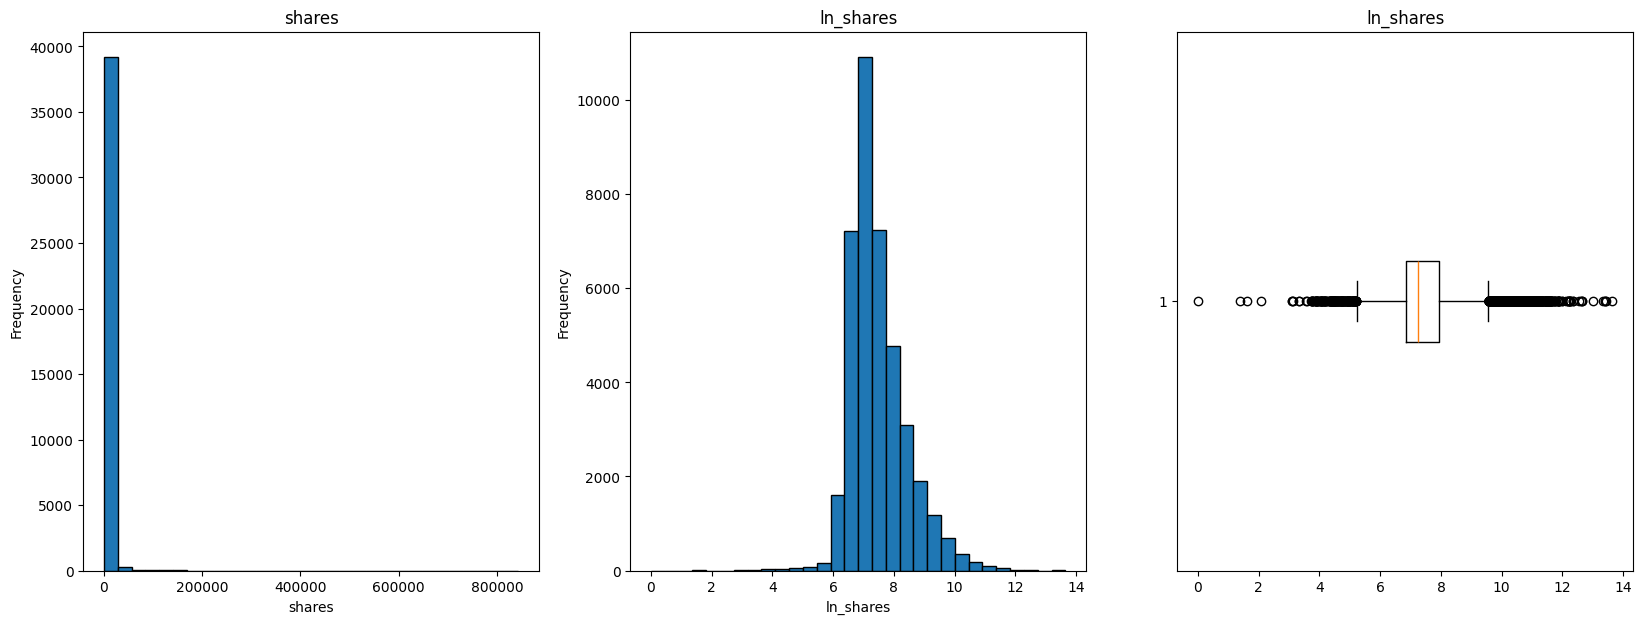

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20, 7))

ax[0].hist(df['shares'], bins=30, edgecolor='black')
ax[0].set_title('shares')
ax[0].set_xlabel('shares')
ax[0].set_ylabel('Frequency')

ax[1].hist(df['ln_shares'], bins=30, edgecolor='black')
ax[1].set_title('ln_shares')
ax[1].set_xlabel('ln_shares')
ax[1].set_ylabel('Frequency')

ax[2].boxplot(df['ln_shares'], vert=False)
ax[2].set_title('ln_shares')

In [ ]:
df['shares'].describe()

,shares
count,39644.000000
mean,3395.380184
std,11626.950749
min,1.000000
25%,946.000000
50%,1400.000000
75%,2800.000000
max,843300.000000


##### Удаление выбросов

In [ ]:
#фильтрация оставляем чистые даныне и сохраняем в новую переменную

def outlier(col, data):
  """Функция по удалению выбросов более 1.5IQR"""

  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  l = q1 - 1.5*iqr
  r = q3 + 1.5*iqr
  df_new = data[(data[col] > l) & (data[col] < r)]
  return df_new, l, r

In [ ]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,ln_shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,7.223767,0.052946,0.178009,0.157855,0.058597,0.185299,0.212567,26.106801,1153.951682,312.366967,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639,3998.755396,10329.212662,6401.697580,0.168020,0.186409,0.187544,0.183306,0.143805,0.061876,0.069039,0.130915,0.184599,0.141256,0.216321,0.223770,0.234029,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184,7.474855
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,1.909130,0.223929,0.382525,0.364610,0.234871,0.388545,0.409129,69.633215,3857.990877,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,19738.670516,41027.576613,24211.332231,0.373889,0.389441,0.390353,0.386922,0.350896,0.240933,0.253524,0.337312,0.262975,0.219707,0.282145,0.295191,0.289183,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749,0.930486
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,0.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,445.000000,141.750000,0.000000,843300.000000,172846.875000,0.000000,3562.101631,2382.448566,639.000000,1100.000000,981.187500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [ ]:
# df_clean без выбросов ln_shares.
df_clean, lower, upper = outlier('ln_shares', df)

print(f'нижняя граница:, {lower}')
print(f'верхняя граница:, {upper}')
print(f'медиана:, {df_clean["ln_shares"].median()}')
print(f'количество строк в чистых данных: {df_clean.shape[0]}')
print(f'количество строк в изначальный: {df.shape[0]}')

df_clean.describe()

нижняя граница:, 5.224544378384753
верхняя граница:, 9.565072886830421
медиана:, 7.24422751560335
количество строк в чистых данных: 38119
количество строк в изначальный: 39644


,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,ln_shares
count,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.00000,38119.00000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000
mean,354.251318,10.396023,547.705265,0.548784,0.998216,0.690213,10.789239,3.312311,4.470317,1.228679,4.551412,7.220441,0.052520,0.177995,0.160497,0.058947,0.18799,0.21509,26.238936,1131.240661,308.975519,13441.253653,751604.126551,257891.432594,1109.289093,5573.893019,3105.951211,3848.841363,10084.732437,6203.598480,0.167528,0.187098,0.188095,0.183662,0.143682,0.061360,0.068575,0.129935,0.186395,0.141111,0.218674,0.217675,0.236118,0.442498,0.119422,0.039673,0.016562,0.683291,0.287485,0.353311,0.095124,0.756344,-0.258493,-0.520513,-0.107157,0.280566,0.070647,0.341752,0.154808,2247.170125,7.389407
std,214.588472,2.112451,468.740257,3.590302,5.334672,3.329280,11.174644,3.862874,8.227630,4.074151,0.835388,1.910730,0.223076,0.382514,0.367072,0.235529,0.39071,0.41089,69.795486,3468.011496,557.247106,57549.538375,215578.774790,134466.030907,1129.233644,5817.246084,1274.284431,19660.127091,40926.269298,24100.861388,0.373452,0.389996,0.390793,0.387213,0.350771,0.239993,0.252733,0.336237,0.264380,0.219828,0.283651,0.291816,0.290141,0.115708,0.096237,0.017416,0.010740,0.189257,0.155726,0.103663,0.070788,0.247102,0.126962,0.289898,0.094577,0.323019,0.263652,0.188918,0.224806,2262.027981,0.756168
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,186.000000,5.225747
25%,164.000000,9.000000,248.000000,0.470733,1.000000,0.626016,4.000000,1.000000,1.000000,0.000000,4.479091,6.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,-1.000000,446.000000,141.833333,0.000000,843300.000000,172226.111111,0.000000,3551.066558,2373.719942,638.000000,1100.000000,978.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

Text(0.5, 1.0, 'ln_shares_boxplot')

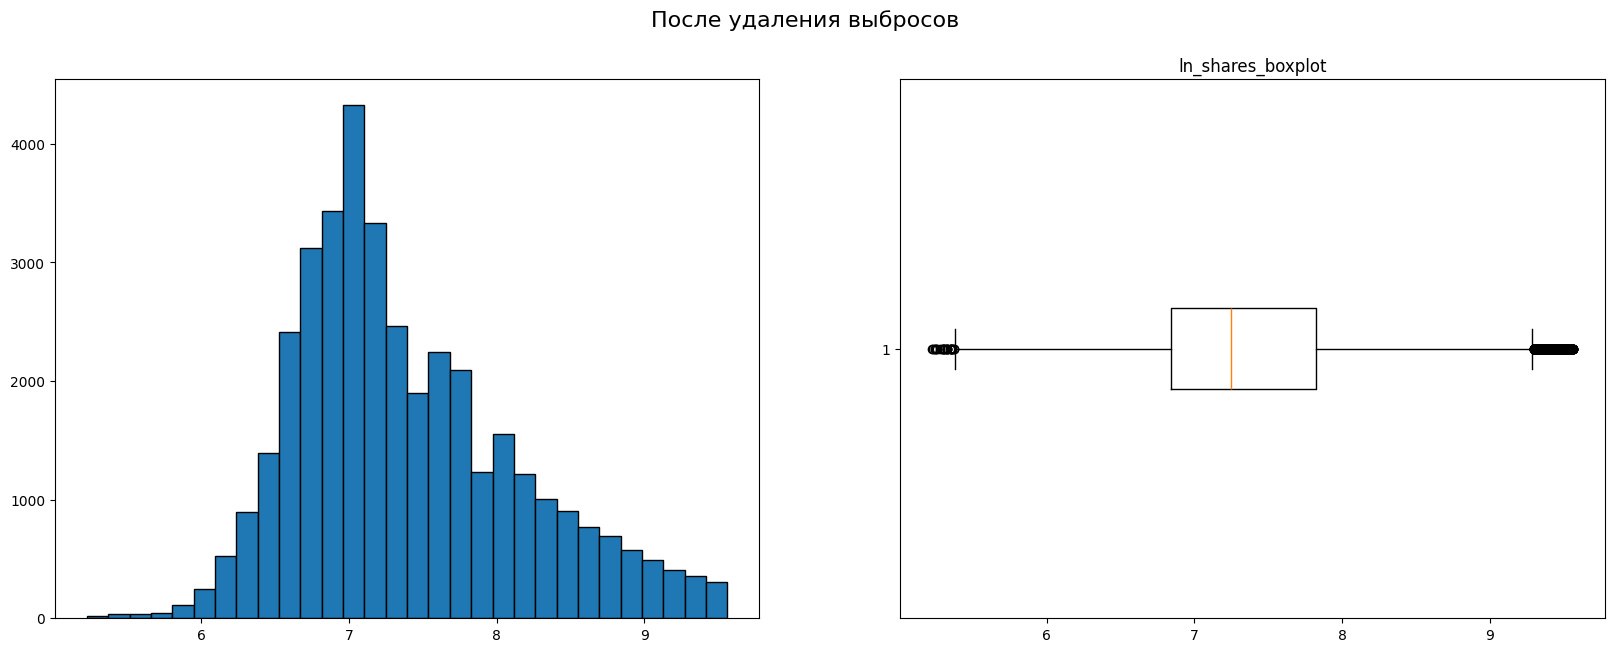

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

ax[0].hist(df_clean['ln_shares'], bins=30, edgecolor='black')
fig.suptitle('После удаления выбросов', fontsize=16) # заголовок над subplots посмотреть как сделать

ax[1].boxplot(df_clean['ln_shares'], vert=False)
ax[1].set_title('ln_shares_boxplot')

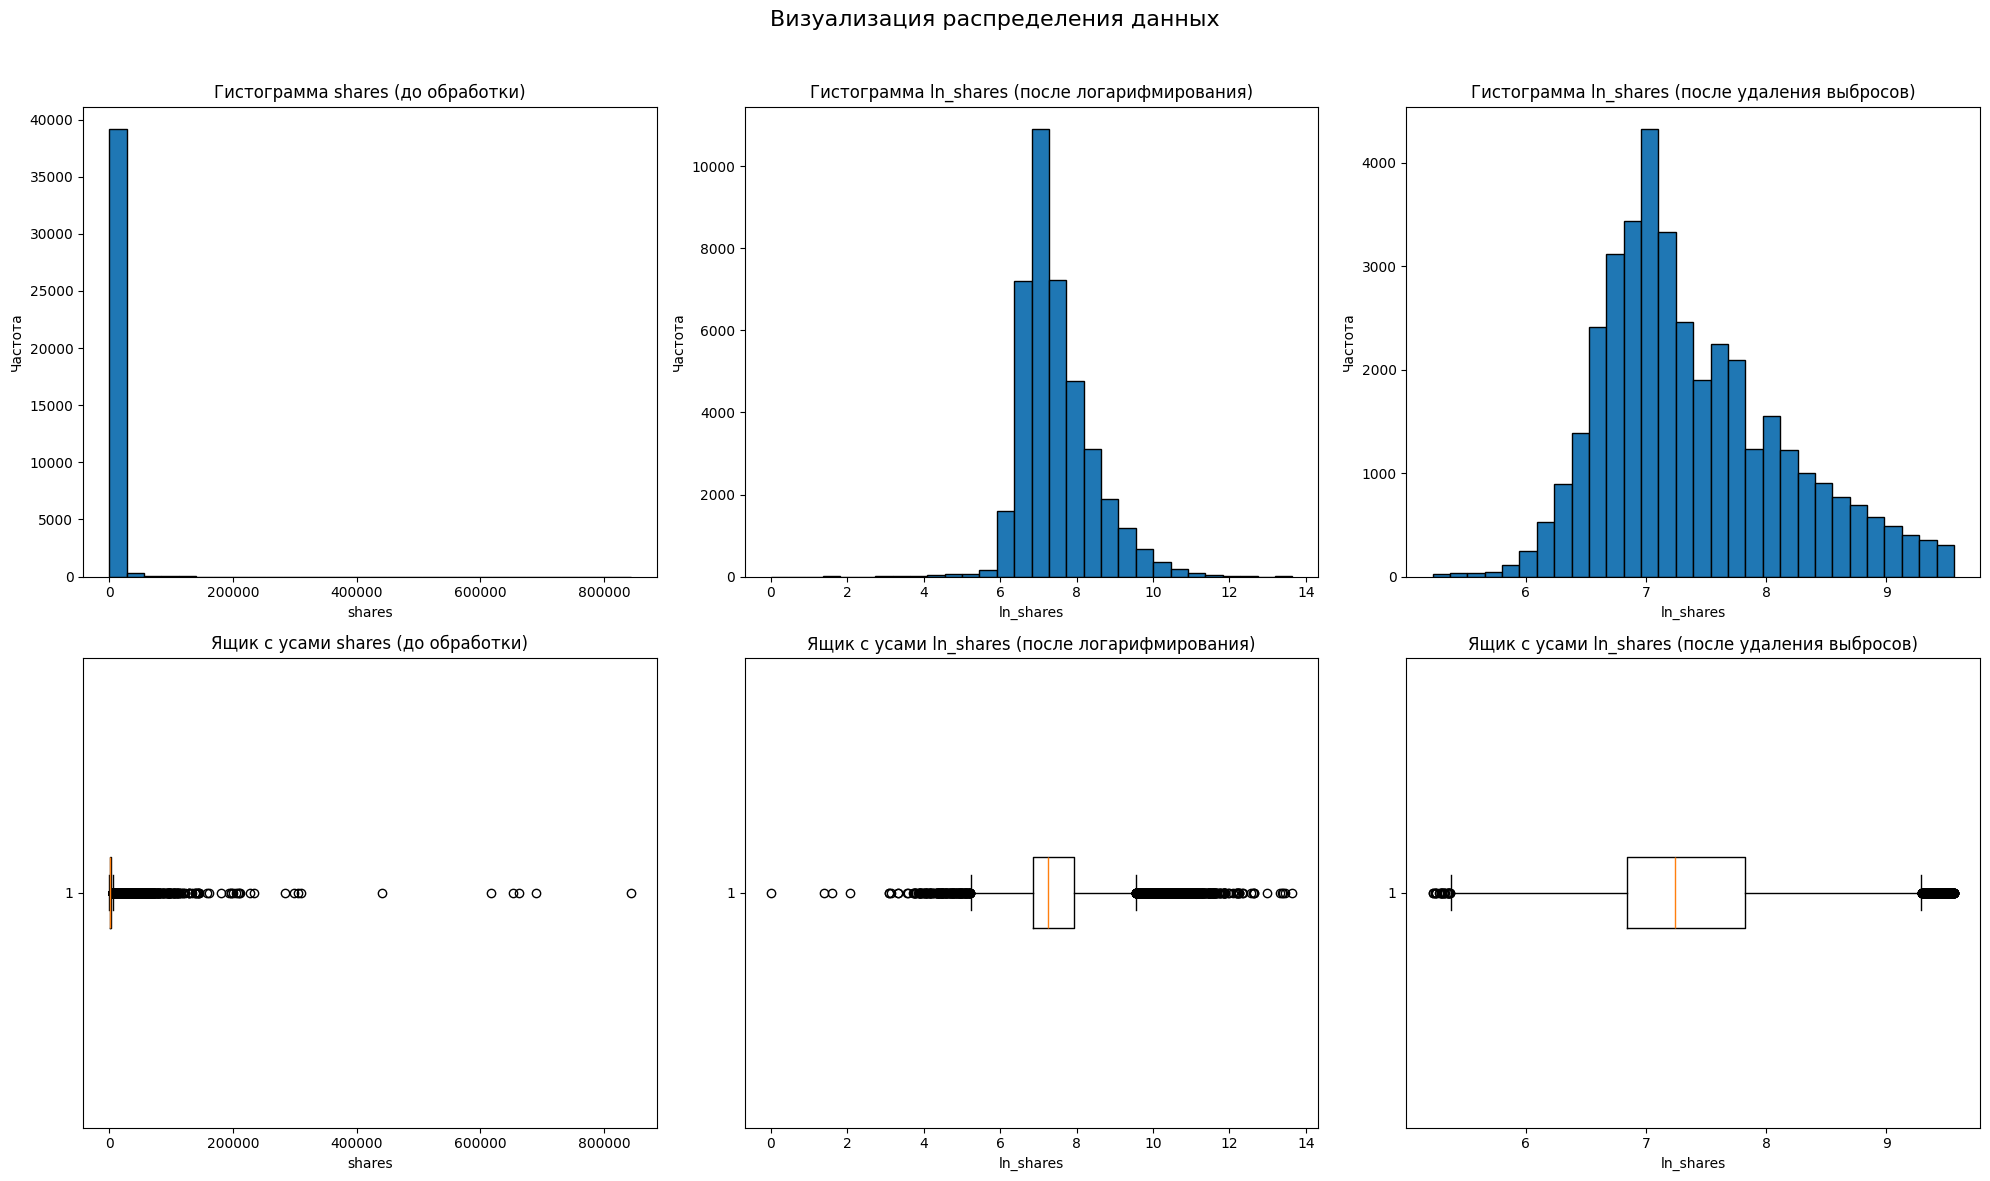

In [ ]:
# МИХАИЛ
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Визуализация распределения данных', fontsize=16)

axes[0, 0].hist(df['shares'], bins=30, edgecolor='black')
axes[0, 0].set_title('Гистограмма shares (до обработки)')
axes[0, 0].set_xlabel('shares')
axes[0, 0].set_ylabel('Частота')

axes[1, 0].boxplot(df['shares'], vert=False)
axes[1, 0].set_title('Ящик с усами shares (до обработки)')
axes[1, 0].set_xlabel('shares')

axes[0, 1].hist(df['ln_shares'], bins=30, edgecolor='black')
axes[0, 1].set_title('Гистограмма ln_shares (после логарифмирования)')
axes[0, 1].set_xlabel('ln_shares')
axes[0, 1].set_ylabel('Частота')

axes[1, 1].boxplot(df['ln_shares'], vert=False)
axes[1, 1].set_title('Ящик с усами ln_shares (после логарифмирования)')
axes[1, 1].set_xlabel('ln_shares')

axes[0, 2].hist(df_clean['ln_shares'], bins=30, edgecolor='black')
axes[0, 2].set_title('Гистограмма ln_shares (после удаления выбросов)')
axes[0, 2].set_xlabel('ln_shares')
axes[0, 2].set_ylabel('Частота')

axes[1, 2].boxplot(df_clean['ln_shares'], vert=False)
axes[1, 2].set_title('Ящик с усами ln_shares (после удаления выбросов)')
axes[1, 2].set_xlabel('ln_shares')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### Остальные количественные

In [ ]:
#МАКСИМ

# Список всех признаков df_clean
df_col_list = list(df_clean.columns)

# Список всех количественных признаков df_clean без ln_shares.
lst_float = [col for col in df_col_list
             if col != 'ln_shares'
             and df_clean[col].nunique() > 2
             and df_clean[col].dtype == 'float64'
             ]

# количество колич дискр признаков df_clean
discrete = sum(1 for col in df_col_list if df_clean[col].nunique() == 2)

print(f'кол-во колич дискр перем: {discrete}')
print()
print(f'кол-во колич непрерыв перем: {len(lst_float)}')

count_more_0 = 0
count_0 = 0
count_less_0 = 0
col_more_0 = []

for col in lst_float:
  if df_clean[col].min() > 0:
    count_more_0 += 1
    col_more_0.append(col)
  elif df_clean[col].min() == 0:
    count_0 += 1
  else:
    count_less_0 += 1

print(f'кол-во колич перем min>0: {count_more_0} : {col_more_0}')
print(f'кол-во колич перем min=0: {count_0}')
print(f'кол-во колич перем min<0: {count_less_0}')

кол-во колич дискр перем: 14

кол-во колич непрерыв перем: 45
кол-во колич перем min>0: 3 : ['timedelta', 'n_tokens_title', 'num_keywords']
кол-во колич перем min=0: 34
кол-во колич перем min<0: 8


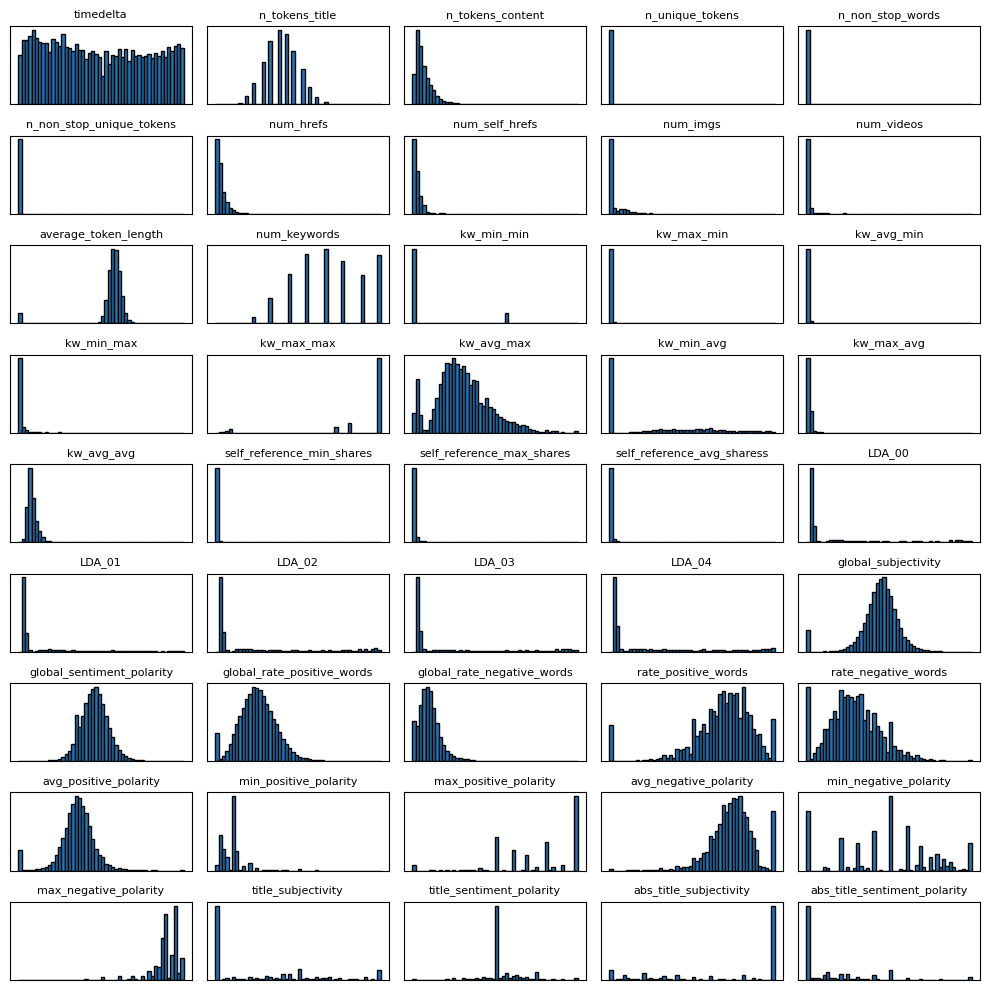

In [ ]:
# Построение всех 45-ти количественных переменных для анализа их распределения

# Создаем фигуру 9х5
fig, ax = plt.subplots(9, 5, figsize=(10, 10))

# Преобразуем 2D массив осей в 1D
ax = ax.flatten()

# Построение количественных переменных из lst_float
for idx, col in enumerate(lst_float):
    ax[idx].hist(df_clean[col], bins=50, edgecolor='black')
    ax[idx].set_title(col, fontsize=8)
    ax[idx].get_xaxis().set_visible(False)
    ax[idx].get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()

Количественно оценим изменения в скошенности и островершинности (то есть сосредоточенности значений вокруг среднего) распределения.


1.   Коэффициент ассиметрии skewness

в нормальном распределении должен быть равен нулю. При этом:
положительные значения говорят о скошенности вправо (positively или right-skewed); отрицательные, о скошенности влево (negatively или left-skewed)

2.   Коэффициент эксцесса kurtosis

Измеряет островершинность распределения.
Можно сказать, что эксцесс показывает сосредоточенность (плотность) значений вокруг среднего.
По формуле Фишера (Fisher’s definition) для нормального распределения значение этого коэффициента также равно нулю.
Одновременно,положительные значения говорят о большей сосредоточенности значений около среднего (острая вершина);
отрицательные — о наличии более «тяжелых хвостов» (плоская вершина)



In [ ]:
from scipy.stats import skew, kurtosis

# список логарифмированных переменных
lst_float_ln =[]

# Словарь значений переменных skew и kurtosis
dict_skew_kurtosis ={}

# Выберем переменные со скосом: skew > 1
for col in lst_float:
    if skew(df_clean[col]) > 1:
        dict_skew_kurtosis[col] = [round(skew(df_clean[col]), 2), round(kurtosis(df_clean[col]), 2)]
        lst_float_ln.append(col)

df_clean_ln = pd.DataFrame()
# преобразование обратного гиперболического синуса (inverse hyperbolic sine (IHS) transformation).
for col in lst_float_ln:
    df_clean_ln['_ln' + col] = df_clean[col].apply(
        lambda x: np.log(x + np.sqrt(x + 1))
    )

dict_skew_kurtosis

<ipython-input-15-1b81c45b7995>:19: RuntimeWarning: invalid value encountered in log
  lambda x: np.log(x + np.sqrt(x + 1))
<ipython-input-15-1b81c45b7995>:19: RuntimeWarning: invalid value encountered in log
  lambda x: np.log(x + np.sqrt(x + 1))


{'n_tokens_content': [2.86, 18.04],
 'n_unique_tokens': [194.81, 38004.46],
 'n_non_stop_words': [194.94, 38038.37],
 'n_non_stop_unique_tokens': [194.62, 37953.64],
 'num_hrefs': [4.06, 36.91],
 'num_self_hrefs': [5.16, 56.34],
 'num_imgs': [3.99, 24.9],
 'num_videos': [7.12, 76.33],
 'kw_min_min': [2.37, 3.62],
 'kw_max_min': [32.01, 1870.16],
 'kw_avg_min': [28.68, 1464.2],
 'kw_min_max': [10.42, 124.24],
 'kw_max_avg': [15.6, 428.25],
 'kw_avg_avg': [5.38, 89.29],
 'self_reference_min_shares': [27.27, 910.52],
 'self_reference_max_shares': [14.09, 229.46],
 'self_reference_avg_sharess': [18.5, 449.53],
 'LDA_00': [1.55, 1.0],
 'LDA_01': [2.09, 3.37],
 'LDA_02': [1.29, 0.2],
 'LDA_03': [1.29, 0.11],
 'LDA_04': [1.16, -0.12],
 'global_rate_negative_words': [1.4, 5.64],
 'min_positive_polarity': [3.04, 17.44],
 'abs_title_sentiment_polarity': [1.71, 2.69]}

In [ ]:
df_clean_ln.describe()

,_lnn_tokens_content,_lnn_unique_tokens,_lnn_non_stop_words,_lnn_non_stop_unique_tokens,_lnnum_hrefs,_lnnum_self_hrefs,_lnnum_imgs,_lnnum_videos,_lnkw_min_min,_lnkw_max_min,_lnkw_avg_min,_lnkw_min_max,_lnkw_max_avg,_lnkw_avg_avg,_lnself_reference_min_shares,_lnself_reference_max_shares,_lnself_reference_avg_sharess,_lnLDA_00,_lnLDA_01,_lnLDA_02,_lnLDA_03,_lnLDA_04,_lnglobal_rate_negative_words,_lnmin_positive_polarity,_lnabs_title_sentiment_polarity
count,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,16006.000000,38119.000000,37411.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000
mean,5.942594,0.561855,0.855892,0.667814,2.339997,1.394952,1.266585,0.464762,2.840565,6.431011,5.452876,5.046689,8.486769,7.986309,6.199524,6.916456,6.666781,0.202923,0.160187,0.234813,0.231269,0.252477,0.024372,0.128407,0.174166
std,1.243563,0.129014,0.151416,0.138588,0.797776,0.743992,0.997614,0.748526,1.635583,1.295216,0.894660,4.518682,0.578462,0.488444,3.069676,3.424886,3.272385,0.254047,0.215679,0.269805,0.276445,0.275423,0.015501,0.082250,0.229218
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.486206,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.575114,0.520858,0.881374,0.642469,1.830350,0.881374,0.881374,0.000000,1.830350,6.146634,5.068636,0.000000,8.191647,7.792535,6.497195,7.032784,6.917001,0.036818,0.036757,0.041868,0.037794,0.041872,0.014263,0.072037,0.000000
50%,6.069172,0.576148,0.881374,0.688466,2.285279,1.609438,0.881374,0.000000,1.830350,6.528967,5.539848,7.270612,8.385719,7.974762,7.118547,7.956100,7.717313,0.048752,0.048676,0.058094,0.058084,0.061781,0.022671,0.138726,0.000000
75%,6.611766,0.628999,0.881374,0.731848,2.817900,1.830350,1.830350,0.881374,5.445723,6.938904,5.938438,8.960308,8.707273,8.194049,7.882692,8.973139,8.531238,0.307897,0.201246,0.403512,0.414559,0.465798,0.031981,0.138726,0.313375
max,8.968539,6.589608,6.979420,6.515475,5.772886,4.842742,4.937045,4.611069,5.982530,12.608019,10.601099,13.646166,12.608019,10.540103,13.646166,13.646166,13.646166,0.839477,0.838862,0.835358,0.839207,0.839593,0.215124,0.881374,0.881374


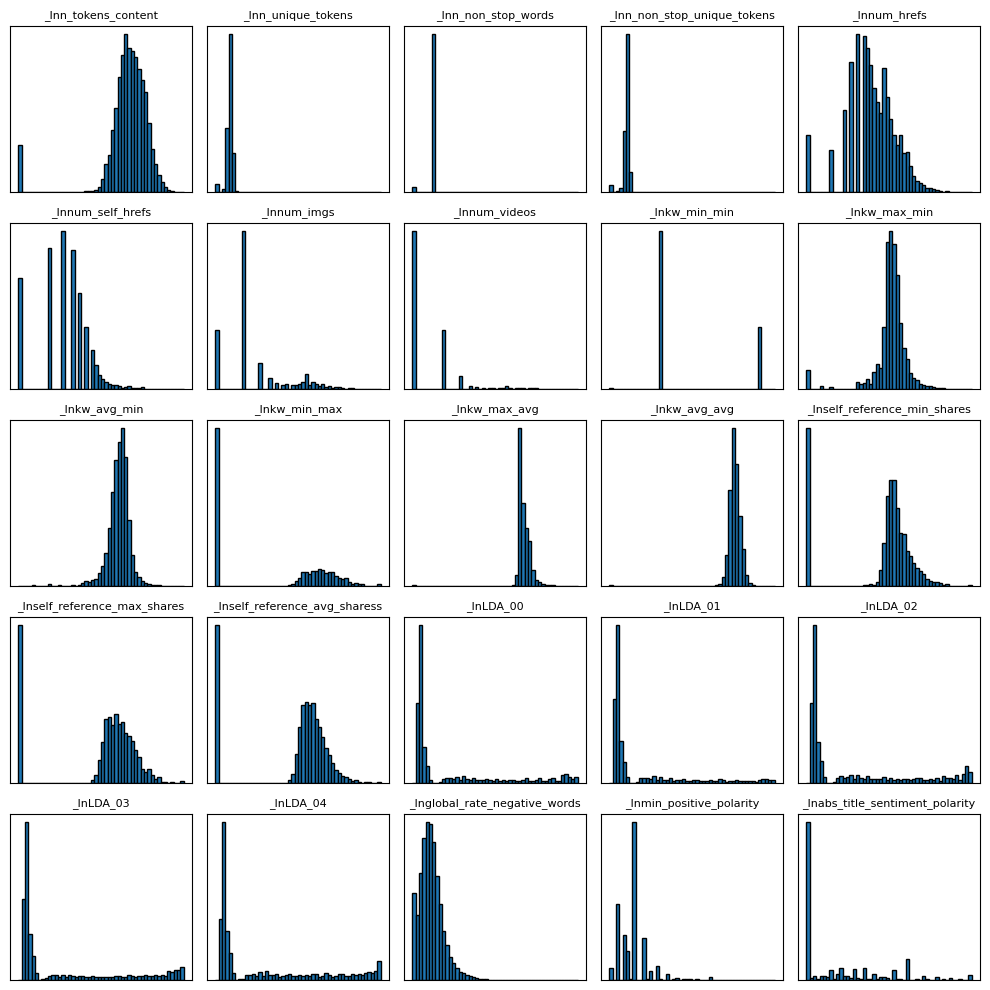

In [ ]:
# Построение 25-ти логарифмированных количественных переменных

# Создаем фигуру 5х5
fig, ax = plt.subplots(5, 5, figsize=(10, 10))

# Преобразуем 2D массив осей в 1D
ax = ax.flatten()

# Построение количественных переменных из lst_float_ln
for idx, col in enumerate(df_clean_ln.keys()):
    ax[idx].hist(df_clean_ln[col], bins=50, edgecolor='black')
    ax[idx].set_title(col, fontsize=8)
    ax[idx].get_xaxis().set_visible(False)
    ax[idx].get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()

In [ ]:
# посмотреть еще раз на корреляцию и выбрать 5 наиболее сильных

# Объединенная
df_comb = pd.concat([df_clean, df_clean_ln], axis=1)

# Предлагаю оставить те признаки, где критерий Спирмена > 0.1
THRESHOLD = 0.15

corr_pearson = df_comb.corr(numeric_only=True)['ln_shares'].abs().sort_values(ascending=False)
corr_spearman = df_comb.corr(numeric_only=True, method='spearman')['ln_shares'].abs().sort_values(ascending=False)
corr_df = pd.DataFrame({'Pearson': corr_pearson, 'Spearman': corr_spearman})

important_features = corr_df[(corr_df['Pearson'] > THRESHOLD) | (corr_df['Spearman'] > THRESHOLD)]
important_features.Spearman.sort_values(ascending=False)


,Spearman
ln_shares,1.000000
shares,1.000000
_lnkw_avg_avg,0.232024
kw_avg_avg,0.232024
_lnkw_max_avg,0.196972
kw_max_avg,0.196972
_lnself_reference_avg_sharess,0.173606
self_reference_avg_sharess,0.173606
_lnself_reference_min_shares,0.165508
self_reference_min_shares,0.165508


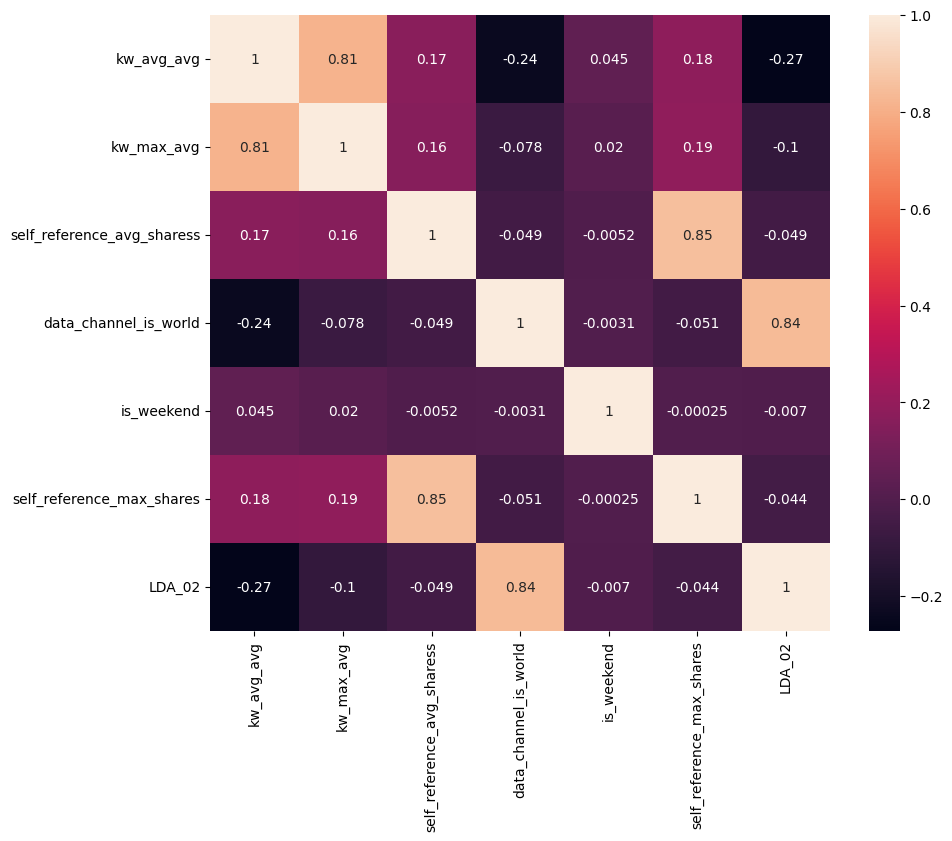

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


selected_columns = ['kw_avg_avg',
                    'kw_max_avg',
                    'self_reference_avg_sharess',
                    'data_channel_is_world',
                    'is_weekend',
                    'self_reference_max_shares',
                    'LDA_02'
                    ]

# Выбор указанных столбцов из датафрейма
subset_df = df[selected_columns]
corr_matrix = subset_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True);

In [ ]:
# по этим 5 столбцам удалить выбросы через функцию outliers

for col in ['kw_avg_avg',
            'kw_max_avg',
            'self_reference_avg_sharess',
            'self_reference_max_shares',
            'LDA_02']:
            outlier(col, df_comb)
df_comb.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,ln_shares,_lnn_tokens_content,_lnn_unique_tokens,_lnn_non_stop_words,_lnn_non_stop_unique_tokens,_lnnum_hrefs,_lnnum_self_hrefs,_lnnum_imgs,_lnnum_videos,_lnkw_min_min,_lnkw_max_min,_lnkw_avg_min,_lnkw_min_max,_lnkw_max_avg,_lnkw_avg_avg,_lnself_reference_min_shares,_lnself_reference_max_shares,_lnself_reference_avg_sharess,_lnLDA_00,_lnLDA_01,_lnLDA_02,_lnLDA_03,_lnLDA_04,_lnglobal_rate_negative_words,_lnmin_positive_polarity,_lnabs_title_sentiment_polarity
count,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.00000,38119.00000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,16006.000000,38119.000000,37411.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000
mean,354.251318,10.396023,547.705265,0.548784,0.998216,0.690213,10.789239,3.312311,4.470317,1.228679,4.551412,7.220441,0.052520,0.177995,0.160497,0.058947,0.18799,0.21509,26.238936,1131.240661,308.975519,13441.253653,751604.126551,257891.432594,1109.289093,5573.893019,3105.951211,3848.841363,10084.732437,6203.598480,0.167528,0.187098,0.188095,0.183662,0.143682,0.061360,0.068575,0.129935,0.186395,0.141111,0.218674,0.217675,0.236118,0.442498,0.119422,0.039673,0.016562,0.683291,0.287485,0.353311,0.095124,0.756344,-0.258493,-0.520513,-0.107157,0.280566,0.070647,0.341752,0.154808,2247.170125,7.389407,5.942594,0.561855,0.855892,0.667814,2.339997,1.394952,1.266585,0.464762,2.840565,6.431011,5.452876,5.046689,8.486769,7.986309,6.199524,6.916456,6.666781,0.202923,0.160187,0.234813,0.231269,0.252477,0.024372,0.128407,0.174166
std,214.588472,2.112451,468.740257,3.590302,5.334672,3.329280,11.174644,3.862874,8.227630,4.074151,0.835388,1.910730,0.223076,0.382514,0.367072,0.235529,0.39071,0.41089,69.795486,3468.011496,557.247106,57549.538375,215578.774790,134466.030907,1129.233644,5817.246084,1274.284431,19660.127091,40926.269298,24100.861388,0.373452,0.389996,0.390793,0.387213,0.350771,0.239993,0.252733,0.336237,0.264380,0.219828,0.283651,0.291816,0.290141,0.115708,0.096237,0.017416,0.010740,0.189257,0.155726,0.103663,0.070788,0.247102,0.126962,0.28989

In [ ]:
df_comb[['LDA_02','LDA_02_ln']]

KeyError: "['LDA_02_ln'] not in index"

 Переменные с максимальной корреляцией к ln_shares


**количественные**

1.  'kw_avg_avg'
2.  'kw_max_avg'
3.  'self_reference_avg_sharess'
4.  'self_reference_max_shares'
5.   'LDA_02'


**категориальные**

1.   'data_channel_is_world'
2.   'is_weekend'





In [ ]:
# ВЕРОНИКА

# sublots по этим 5 признакам
# корреляции после выбросов